In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Imports
import panel as pn
import os
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
import matplotlib
import numpy as np
import seaborn as sns 
import yfinance as yf
import urllib
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

%matplotlib inline

## Welcome to A-Team Financial Services

In [35]:
# Set tickers for US stock portfolio
Facebook = yf.Ticker("FB")
Google = yf.Ticker("GOOG")
Apple = yf.Ticker("AAPL")
Amazon = yf.Ticker("AMZN")
Netflix = yf.Ticker("NFLX")
Microsoft = yf.Ticker("MSFT")

# Set tickers for Australian stock portfolio
CBA = yf.Ticker("CBA")
CSL = yf.Ticker("CSL")
BHP = yf.Ticker("BHP")
TELSTRA = yf.Ticker("TLS")

### Portfolio Analysis
#### US Portfolio (via Plotly Express)

In [36]:
us_portfolio = px.data.stocks(indexed=True)-1
us_portfolio.head()

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988
2018-01-15,0.032008,0.019771,0.053240,-0.029757,0.049860,0.020524
2018-01-22,0.066783,-0.019943,0.140676,0.016858,0.307681,0.066561
2018-01-29,0.008773,-0.082857,0.163374,0.018357,0.273537,0.040708


In [37]:
us_portfolio.to_csv('us_portfolio.csv')
us_portfolio.head()

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988
2018-01-15,0.032008,0.019771,0.053240,-0.029757,0.049860,0.020524
2018-01-22,0.066783,-0.019943,0.140676,0.016858,0.307681,0.066561
2018-01-29,0.008773,-0.082857,0.163374,0.018357,0.273537,0.040708


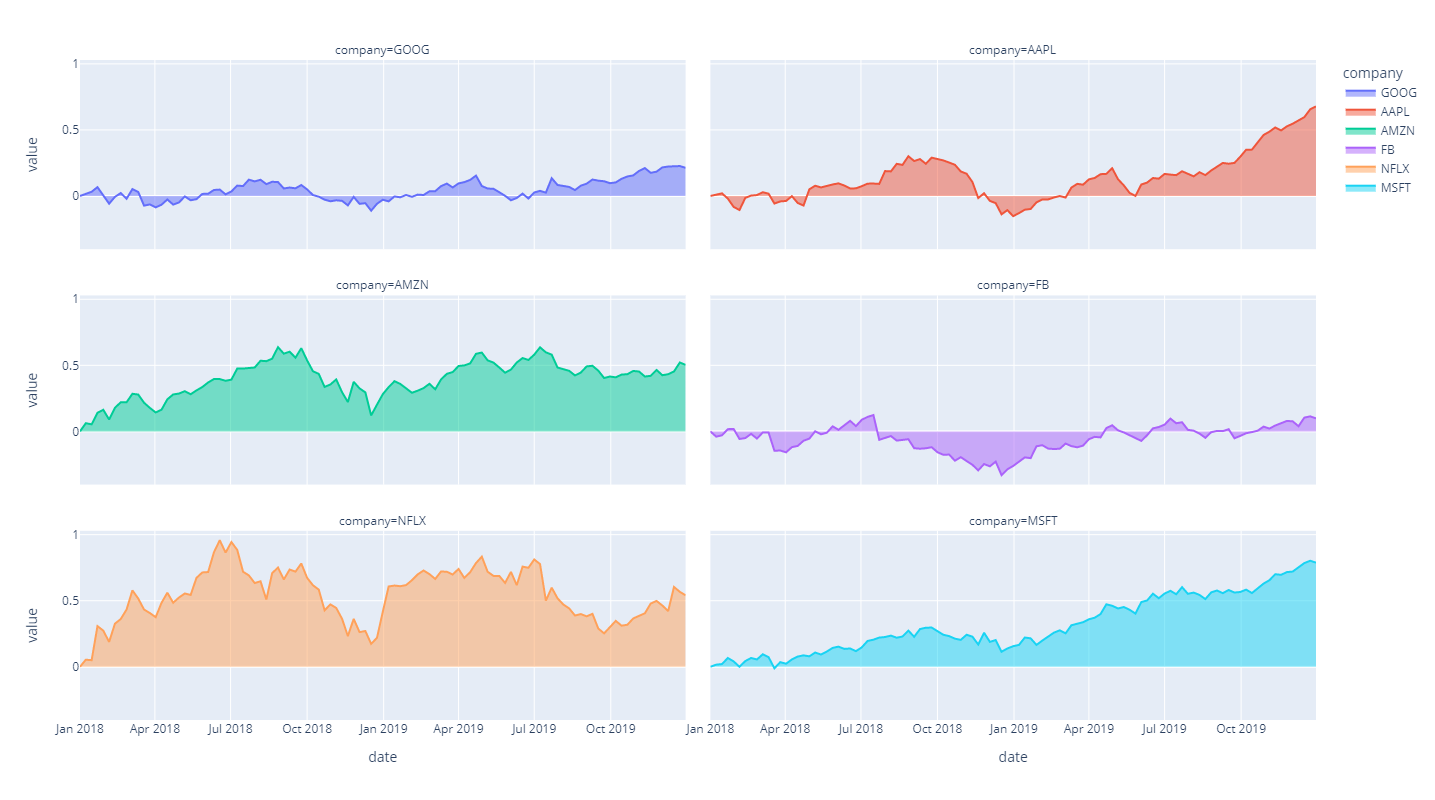

In [38]:
us_portfolio = px.data.stocks(indexed=True)-1
fig = px.area(us_portfolio, facet_col="company", height=800, facet_col_wrap=2)
fig.show()

### Time Series Plot

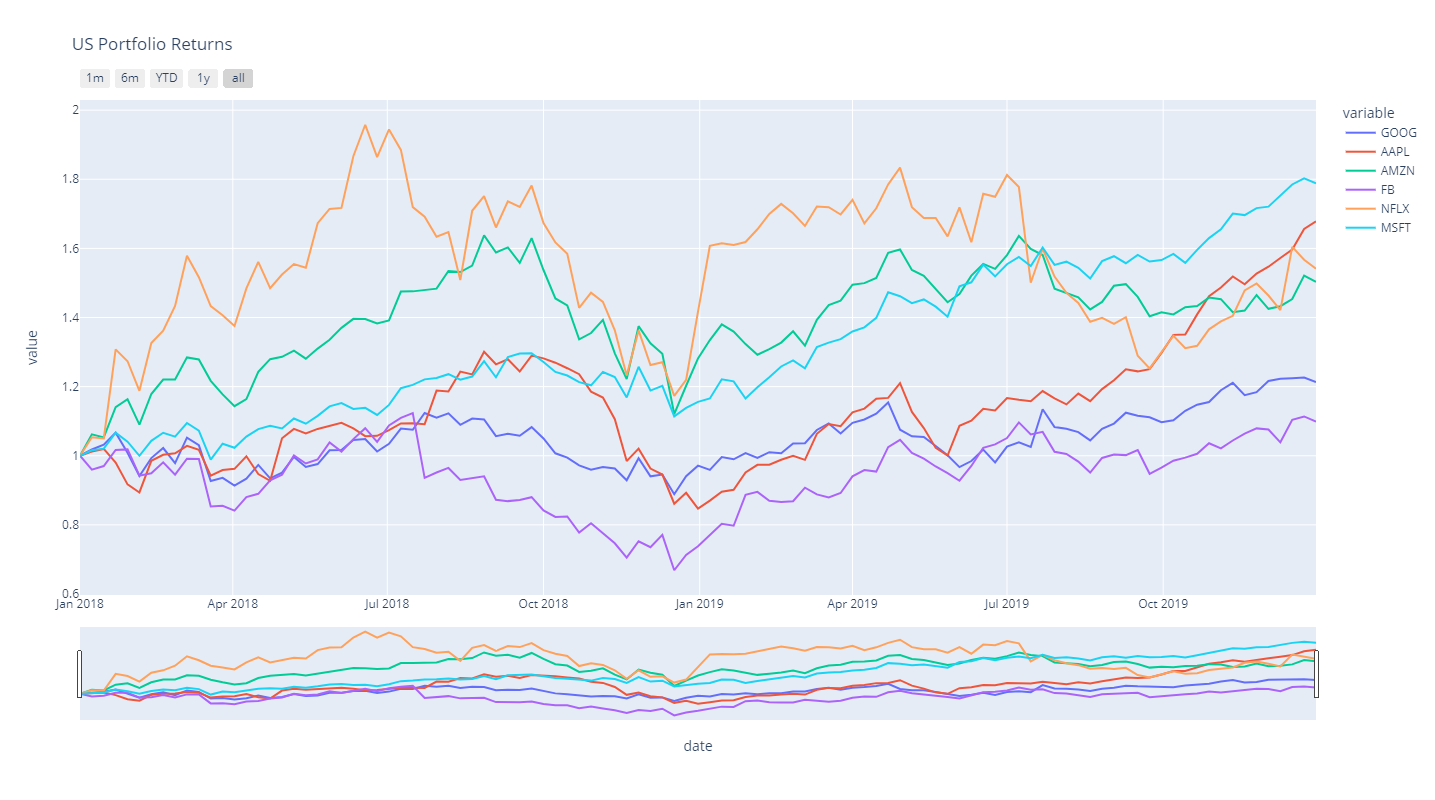

In [39]:
# Time series plot with range slider and selectors - US Portfolio Returns
us_portfolio = px.data.stocks()
fig = px.line(us_portfolio, x="date", y=us_portfolio.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='US Portfolio Returns', height=800)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

### Bar Chart Facet Plot

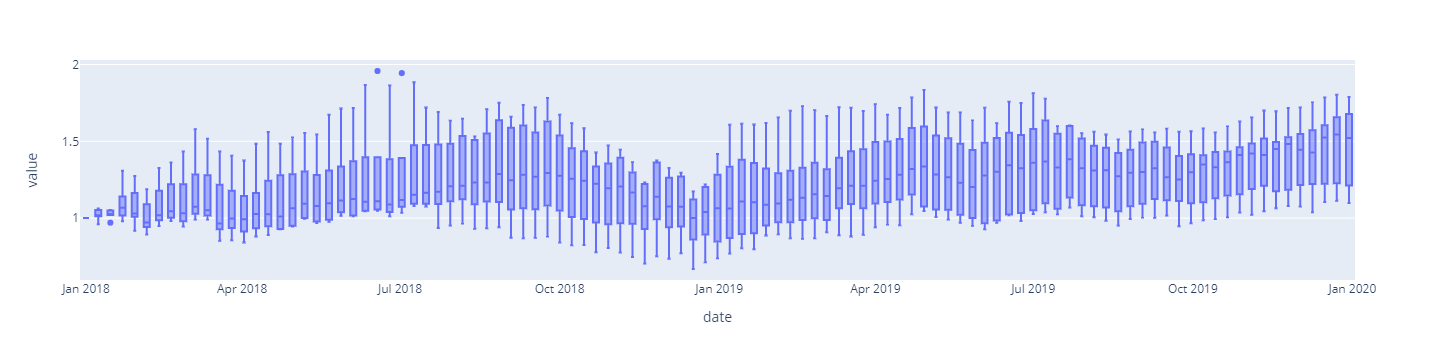

In [40]:
# Bar chart row facet - US portfolio returns
us_portfolio = px.data.stocks()
fig = px.box(us_portfolio, x="date", y=us_portfolio.columns)
fig.show()

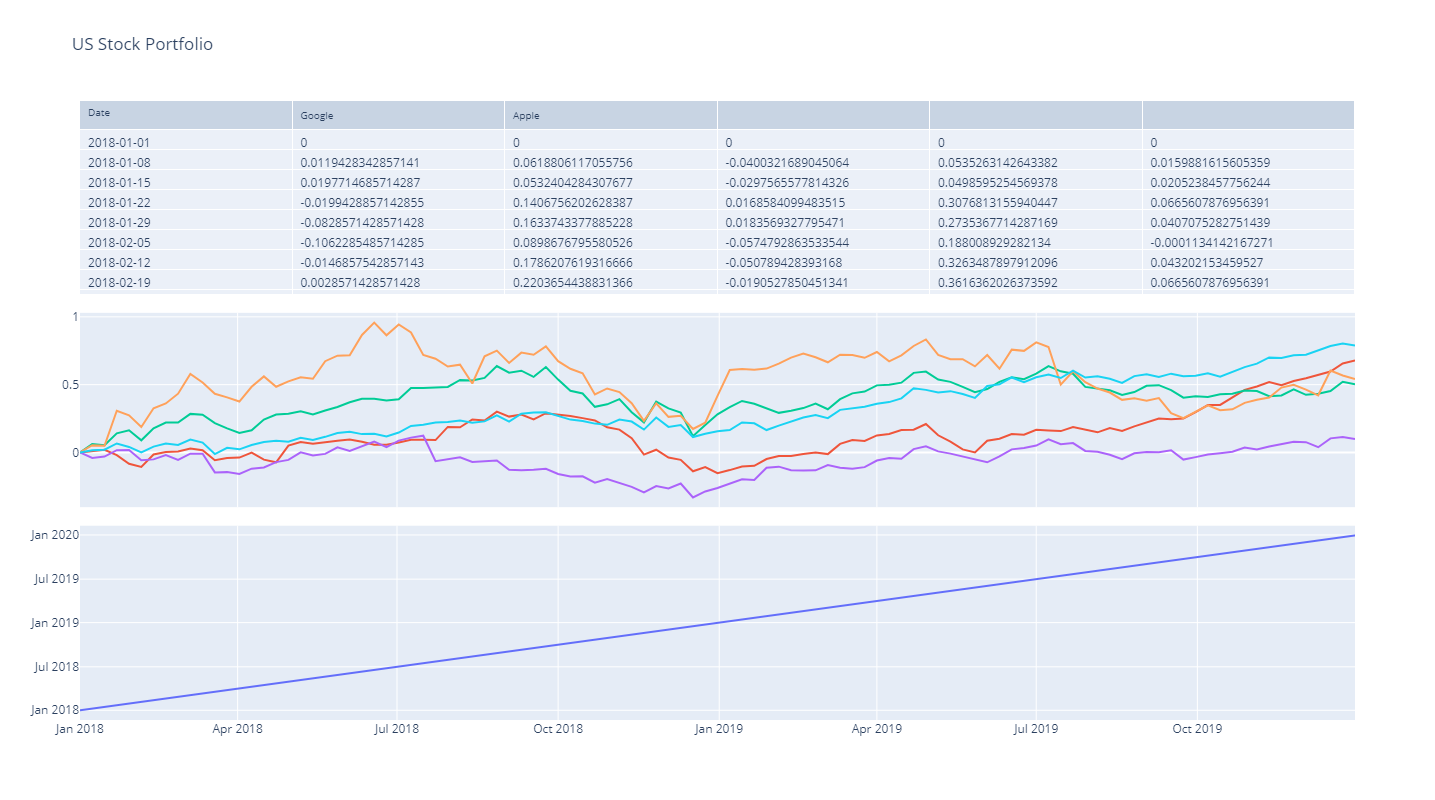

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import re

df = pd.read_csv("us_portfolio.csv")

for i, row in enumerate(df["date"]):
    p = re.compile(" 00:00:00")
    datetime = p.split(df["date"][i])[0]
    df.iloc[i, 1] = datetime

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["GOOG"],
        mode="lines",
        name="Google"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["AAPL"],
        mode="lines",
        name="Apple"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["AMZN"],
        mode="lines",
        name="Amazon"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["FB"],
        mode="lines",
        name="Facebook"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["NFLX"],
        mode="lines",
        name="Netflix"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["MSFT"],
        mode="lines",
        name="Microsoft"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["Date", "Google<br>", "Apple<br>"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns[1:]],
            align = "left")
    ),
    row=1, col=1
)
fig.update_layout(
    height=800,
    showlegend=False,
    title_text="US Stock Portfolio",
)

fig.show()

In [42]:
us_portfolio_sd = us_portfolio.std()
us_portfolio_sd.head()

C:\Users\CharbelNehme\anaconda3\envs\dev\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



GOOG    0.077776
AAPL    0.182109
AMZN    0.140796
FB      0.103350
NFLX    0.200508
dtype: float64

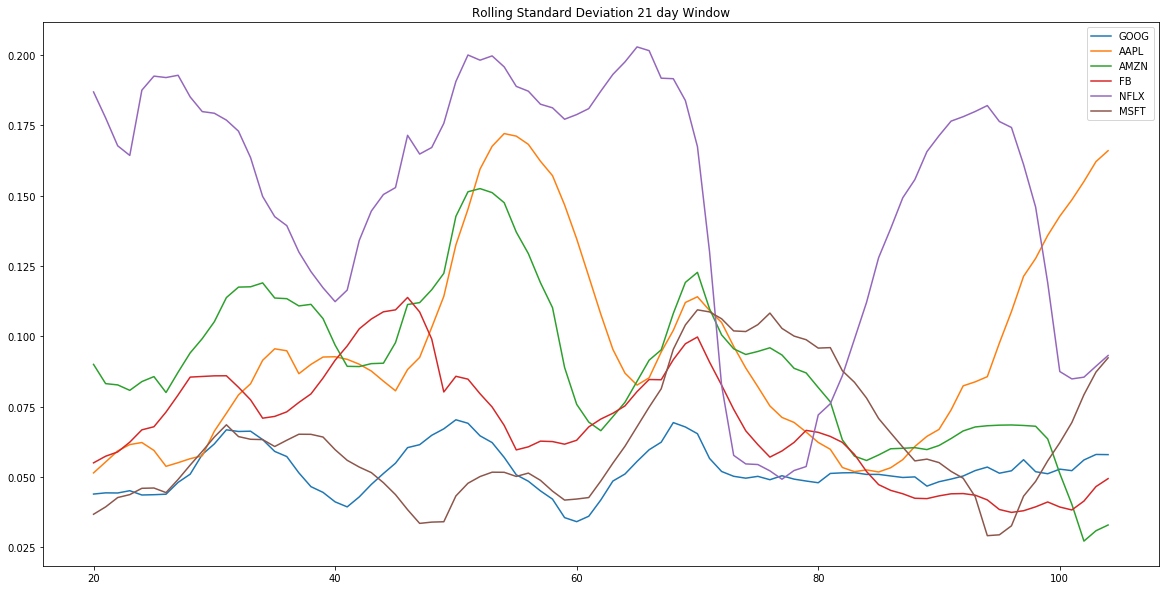

In [43]:
# Plot the rolling standard deviation (21 day window)
us_portfolio.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")

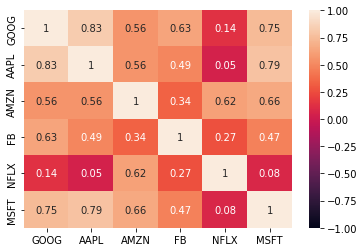

In [44]:
# Calculate the correlation using 'pearson' method
correlation_pearson = us_portfolio.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

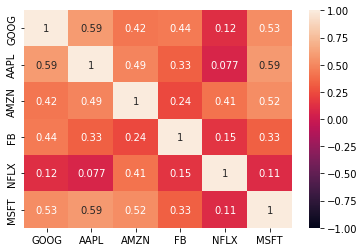

In [45]:
# Calculate the correlation using 'kendall' method
correlation_kendall = us_portfolio.corr(method='kendall')

# Display the correlation matrix
sns.heatmap(correlation_kendall, vmin=-1, vmax=1, annot=True)

In [46]:
# Use `ewm` to calculate the rolling window
us_portfolio.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0]

In [47]:
# Replace null values with '0'
us_portfolio = us_portfolio.fillna(0)
us_portfolio.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [48]:
# Save dataframe as CSV
us_portfolio.to_csv("us_portfolio.csv")

### Facet Area Plots

Facet plots, also known as trellis plots or small multiples, are figures made up of multiple subplots which have the same set of axes, where each subplot shows a subset of the data.

### Time Series Plot

Time series can be represented using either plotly.express functions (px.line, px.scatter, px.bar etc) or plotly.graph_objects charts objects (go.Scatter, go.Bar etc).Plotly auto-sets the axis type to a date format when the corresponding data are either ISO-formatted date strings or if they're a date pandas column or datetime NumPy array.

### Bar Chart Facet Plot

### Standard deviation 
Standard deviation is a statistical term that measures the amount of variability or dispersion around an average. Standard deviation is also a measure of volatility. Dispersion is the difference between the actual value and the average value. The larger this dispersion or variability is, the higher the standard deviation. The smaller this dispersion or variability is, the lower the standard deviation. 

A-Team financial has used standard deviation to measure expected risk and determine the significance of certain price movements. Standard Deviation

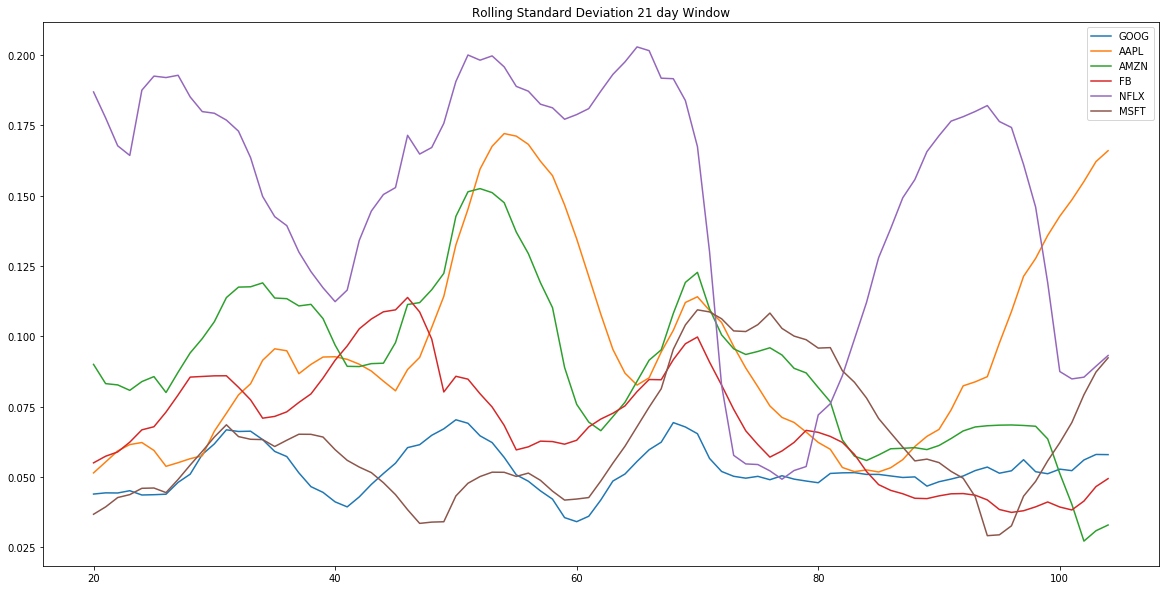

In [49]:
# Plot the rolling standard deviation (21 day window)
us_portfolio.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")

### Correlation
Correlation is a statistic that measures the degree to which two securities move in relation to each other. The correlation statistic is computed as the 'correlation coefficient', which has a value that must fall between -1.0 and +1.0.

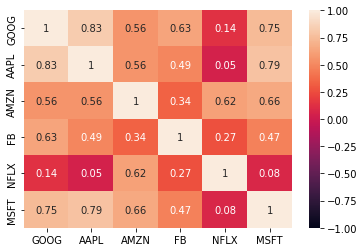

In [51]:
# Calculate the correlation using 'pearson' method
correlation_pearson = us_portfolio.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

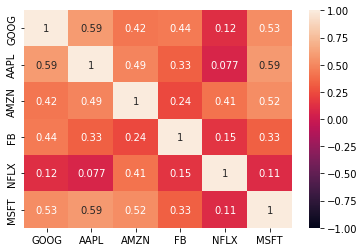

In [52]:
# Calculate the correlation using 'kendall' method
correlation_kendall = us_portfolio.corr(method='kendall')

# Display the correlation matrix
sns.heatmap(correlation_kendall, vmin=-1, vmax=1, annot=True)

### Rolling Window

In [53]:
# Use `ewm` to calculate the rolling window
us_portfolio.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0).std().plot

### Sharpe Ration

### Daily Returns

### Australian Stock Portfolio
#### Financial Analysis via yFinance

In [58]:
# Australian high growth stock information - FY2022
au_stocks_ytd = yf.download("CBA CSL BHP TLS", period="ytd")

[*********************100%***********************]  4 of 4 completed


In [59]:
# Export to CSV
au_stocks_ytd.to_csv('au_stocks_ytd_earnings.csv')

In [60]:
# Calculate daily returns for AU stocks
au_ytd_returns = au_stocks_ytd.pct_change()
au_ytd_returns.head()

Adj Close                              Close                 \
                 BHP  CBA       CSL       TLS       BHP  CBA       CSL   
Date                                                                     
2022-01-03       NaN  NaN       NaN       NaN       NaN  NaN       NaN   
2022-01-04  0.016241  NaN  0.014794 -0.040000  0.016241  NaN  0.014794   
2022-01-05  0.011905  0.0 -0.022731 -0.061198  0.011905  0.0 -0.022731   
2022-01-06  0.001128  0.0 -0.003698 -0.032594  0.001128  0.0 -0.003699   
2022-01-07  0.036059  0.0 -0.014767 -0.016487  0.036059  0.0 -0.014767   

                          High       ...       Low                Open       \
                 TLS       BHP  CBA  ...       CSL       TLS       BHP  CBA   
Date                                 ...                                      
2022-01-03       NaN       NaN  NaN  ...       NaN       NaN       NaN  NaN   
2022-01-04 -0.040000  0.014149  NaN  ...  0.007509 -0.011765 -0.000990  NaN   
2022-01-05 -0.061198  0.021739  0.0  ... -0.009000 -0.048479  0.019990  0.0   
2022-01-06 -0.032594 -0.005399  0.0  ... -0.008507 -0.038716  0.008746  0.0   
2022-01-07 -0.016487  0.027618  0.0  ... -0.012849 -0.027910  0.009794  0.0   

                                  Volume                           
                 CSL       TLS       BHP  CBA       CSL       TLS  
Date                                                               
2022-01-03       NaN       NaN       NaN  NaN       NaN       NaN  
2022-01-04 -0.009208  0.008878  1.096251  NaN  0.154134 -0.134105  
2022-01-05  0.007508 -0.048083  0.921717  NaN -0.008651  0.999214  
2022-01-06 -0.017723 -0.056454 -0.541519  NaN -0.100900  0.064622  
2022-01-07 -0.008570 -0.034290  0.273759  inf -0.322111  0.040384  

[5 rows x 24 columns]

In [61]:
# Use the fillna() function to replace null records with '0'
au_ytd_returns = au_ytd_returns.fillna(0)
au_ytd_returns.head()

Adj Close                              Close                 \
                 BHP  CBA       CSL       TLS       BHP  CBA       CSL   
Date                                                                     
2022-01-03  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
2022-01-04  0.016241  0.0  0.014794 -0.040000  0.016241  0.0  0.014794   
2022-01-05  0.011905  0.0 -0.022731 -0.061198  0.011905  0.0 -0.022731   
2022-01-06  0.001128  0.0 -0.003698 -0.032594  0.001128  0.0 -0.003699   
2022-01-07  0.036059  0.0 -0.014767 -0.016487  0.036059  0.0 -0.014767   

                          High       ...       Low                Open       \
                 TLS       BHP  CBA  ...       CSL       TLS       BHP  CBA   
Date                                 ...                                      
2022-01-03  0.000000  0.000000  0.0  ...  0.000000  0.000000  0.000000  0.0   
2022-01-04 -0.040000  0.014149  0.0  ...  0.007509 -0.011765 -0.000990  0.0   
2022-01-05 -0.061198  0.021739  0.0  ... -0.009000 -0.048479  0.019990  0.0   
2022-01-06 -0.032594 -0.005399  0.0  ... -0.008507 -0.038716  0.008746  0.0   
2022-01-07 -0.016487  0.027618  0.0  ... -0.012849 -0.027910  0.009794  0.0   

                                  Volume                           
                 CSL       TLS       BHP  CBA       CSL       TLS  
Date                                                               
2022-01-03  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  
2022-01-04 -0.009208  0.008878  1.096251  0.0  0.154134 -0.134105  
2022-01-05  0.007508 -0.048083  0.921717  0.0 -0.008651  0.999214  
2022-01-06 -0.017723 -0.056454 -0.541519  0.0 -0.100900  0.064622  
2022-01-07 -0.008570 -0.034290  0.273759  inf -0.322111  0.040384  

[5 rows x 24 columns]

In [62]:
# Export to CSV
au_ytd_returns.to_csv('au_ytd_returns.csv')

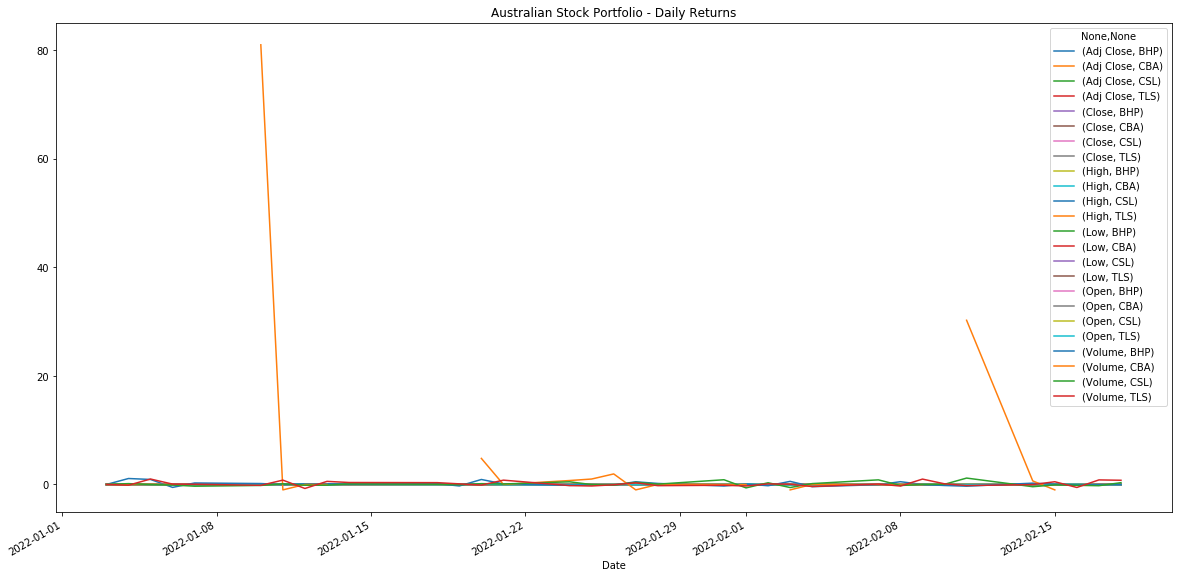

In [63]:
# Plot daily returns 
au_ytd_returns.plot(figsize = (20,10), title = "Australian Stock Portfolio - Daily Returns")

In [64]:
# Calculate cumulative returns
cumulative_returns_au = (1 + au_ytd_returns).cumprod()
cumulative_returns_au.head()

Adj Close                              Close                 \
                 BHP  CBA       CSL       TLS       BHP  CBA       CSL   
Date                                                                     
2022-01-03  1.000000  1.0  1.000000  1.000000  1.000000  1.0  1.000000   
2022-01-04  1.016241  1.0  1.014794  0.960000  1.016241  1.0  1.014794   
2022-01-05  1.028339  1.0  0.991727  0.901250  1.028339  1.0  0.991727   
2022-01-06  1.029499  1.0  0.988059  0.871875  1.029499  1.0  0.988059   
2022-01-07  1.066622  1.0  0.973469  0.857500  1.066622  1.0  0.973469   

                          High       ...       Low                Open       \
                 TLS       BHP  CBA  ...       CSL       TLS       BHP  CBA   
Date                                 ...                                      
2022-01-03  1.000000  1.000000  1.0  ...  1.000000  1.000000  1.000000  1.0   
2022-01-04  0.960000  1.014149  1.0  ...  1.007509  0.988235  0.999010  1.0   
2022-01-05  0.901250  1.036196  1.0  ...  0.998441  0.940327  1.018980  1.0   
2022-01-06  0.871875  1.030602  1.0  ...  0.989947  0.903922  1.027892  1.0   
2022-01-07  0.857500  1.059066  1.0  ...  0.977228  0.878693  1.037960  1.0   

                                  Volume                           
                 CSL       TLS       BHP  CBA       CSL       TLS  
Date                                                               
2022-01-03  1.000000  1.000000  1.000000  1.0  1.000000  1.000000  
2022-01-04  0.990792  1.008878  2.096251  1.0  1.154134  0.865895  
2022-01-05  0.998231  0.960368  4.028402  1.0  1.144150  1.731110  
2022-01-06  0.980539  0.906151  1.846945  1.0  1.028705  1.842977  
2022-01-07  0.972135  0.875079  2.352562  inf  0.697348  1.917404  

[5 rows x 24 columns]

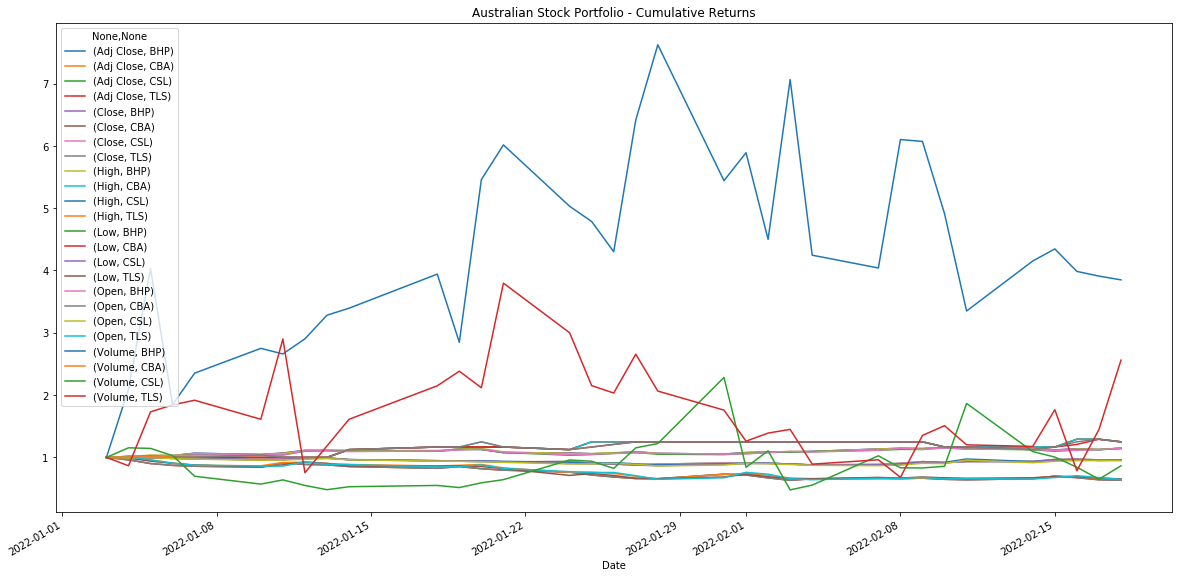

In [65]:
# Plot cumulative returns
cumulative_returns_au.plot(figsize = (20,10), title = "Australian Stock Portfolio - Cumulative Returns")

#### Standard Deviation

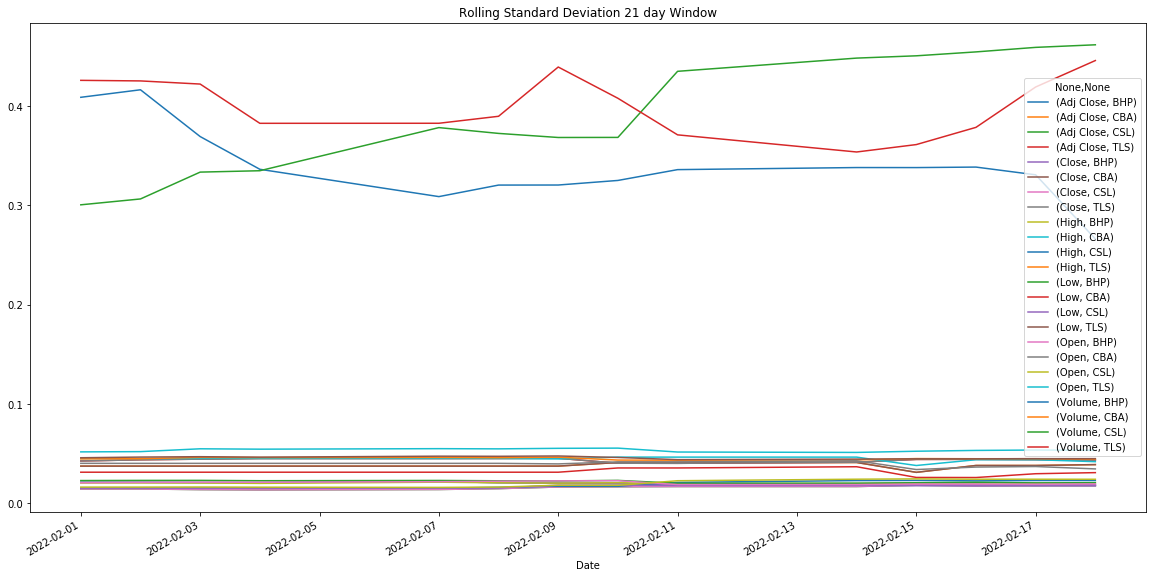

In [66]:
# Calculate the rolling standard deviation for AU portfolio using a 21-day window
au_ytd_returns.rolling(window=21).std()

# Plot the rolling standard deviation (21 day window)
au_ytd_returns.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")

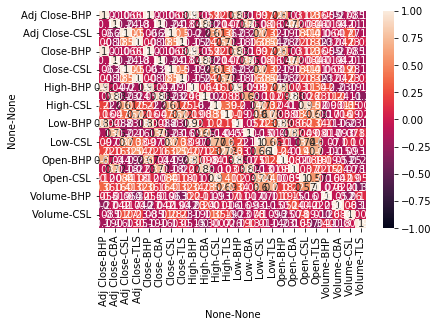

In [67]:
# Calculate the correlation using 'pearson' method
correlation_pearson = au_ytd_returns.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

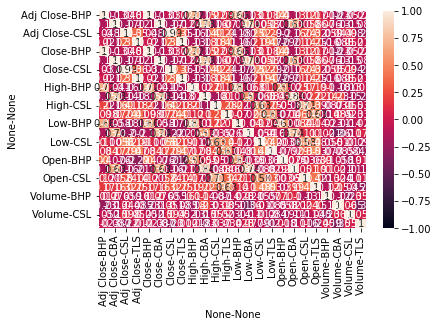

In [68]:
# Calculate the correlation using 'kendall' method
correlation_kendall = au_ytd_returns.corr(method='kendall')

# Display the correlation matrix
sns.heatmap(correlation_kendall, vmin=-1, vmax=1, annot=True)

In [69]:
# Use `ewm` to calculate the rolling window
au_ytd_returns.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0).std().plot

## Facebook Stock Analysis

In [77]:
# Fiancial information - Facebook
FB_financials = FB.financials
FB_financials.head()

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,24655000000.0,18447000000.0,13600000000.0,10273000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,47284000000.0,33180000000.0,24812000000.0,25361000000.0
Minority Interest,None,None,None,None
Net Income,39370000000.0,29146000000.0,18485000000.0,22112000000.0


In [78]:
FB_financials = FB.financials.fillna(0)
FB_financials.head()

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,2.465500e+10,1.844700e+10,1.360000e+10,1.027300e+10
Effect Of Accounting Charges,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Income Before Tax,4.728400e+10,3.318000e+10,2.481200e+10,2.536100e+10
Minority Interest,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Net Income,3.937000e+10,2.914600e+10,1.848500e+10,2.211200e+10


In [79]:
# Save dataframe as CSV
FB_financials.to_csv("fb_financials.csv")

#### Waterfall Chart

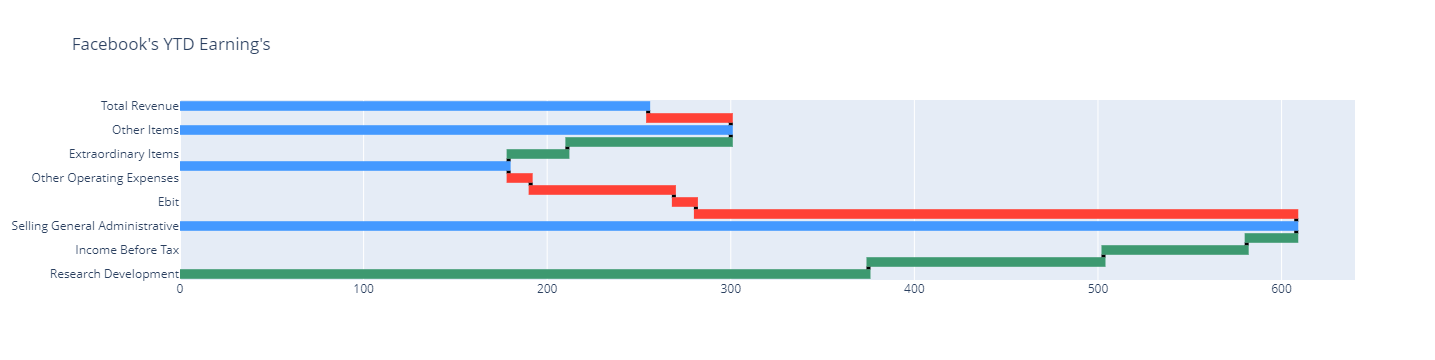

In [80]:
# Display Facebook's P&L statement (FY2021-22) using a waterfall chart
fig = go.Figure(go.Waterfall(
    name = "FY2021-22", orientation = "h", measure = ["relative", "relative", "relative", "relative", "total", "relative",
                                              "relative", "relative", "relative", "total", "relative", "relative", "total", "relative", "total"],
    y = ["Research Development", "Effect Of Accounting Charges", "Income Before Tax", "Net Income", 
         "Selling General Administrative", "Gross Profit", "Ebit", "Operating Income", "Other Operating Expenses", 
         "Interest Expense", "Extraordinary Items", "Non Recurring", "Other Items", "Income Tax Expense", 
         "Total Revenue", "Total Operating Expenses", "Cost of Revenue", "Total Other Income Expense Net", 
         "Discontinued Operations", "Net Income From Continuing Ops", "Net Income Applicable to Common Shares"],
    x = [375, 128, 78, 27, None, -327, -12, -78, -12, None, 32, 89, None, -45, None],
    connector = {"mode":"between", "line":{"width":4, "color":"rgb(0, 0, 0)", "dash":"solid"}}
))

fig.update_layout(title = "Facebook's YTD Earning's ")

fig.show()

In [81]:
# Download dataframe
data_FB = yf.download("FB", period="max")
data_FB.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [82]:
hist_fb = FB.history(period="max")
hist_fb.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


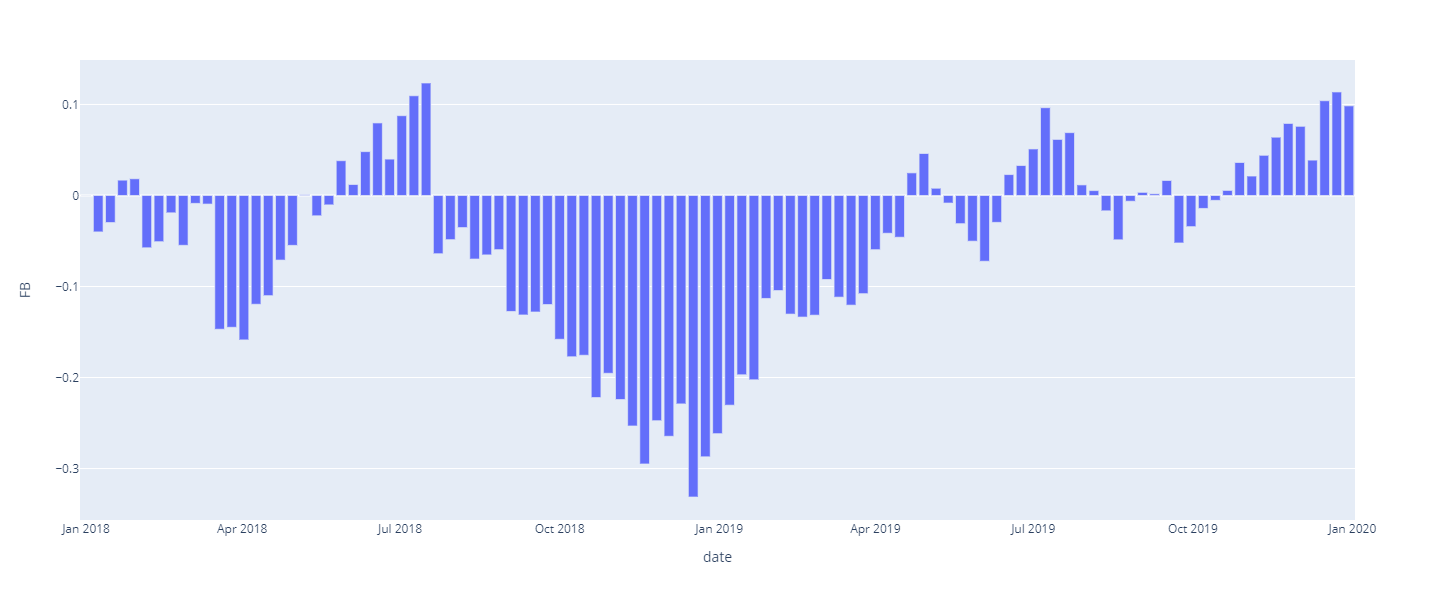

In [83]:
hist_fb = px.data.stocks(indexed=True)-1
fig = px.bar(hist_fb, x=hist_fb.index, y="FB", height=600)
fig.show()

In [84]:
us_portfolio.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [85]:
df_facebook_px_data = px.data.stocks(datetimes=True)
df_facebook_px_data.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [86]:
df_facebook_px_data.drop(['GOOG', 'AAPL', 'AMZN', 'NFLX', 'MSFT'], axis=1)

,date,FB
0,2018-01-01,1.000000
1,2018-01-08,0.959968
2,2018-01-15,0.970243
3,2018-01-22,1.016858
4,2018-01-29,1.018357
...,...,...
100,2019-12-02,1.075997
101,2019-12-09,1.038855
102,2019-12-16,1.104094
103,2019-12-23,1.113728


### Google

In [51]:
# GOOGLE 
# Historical stock data
hist_googl = GOOGL.history(period="max")
hist_googl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0


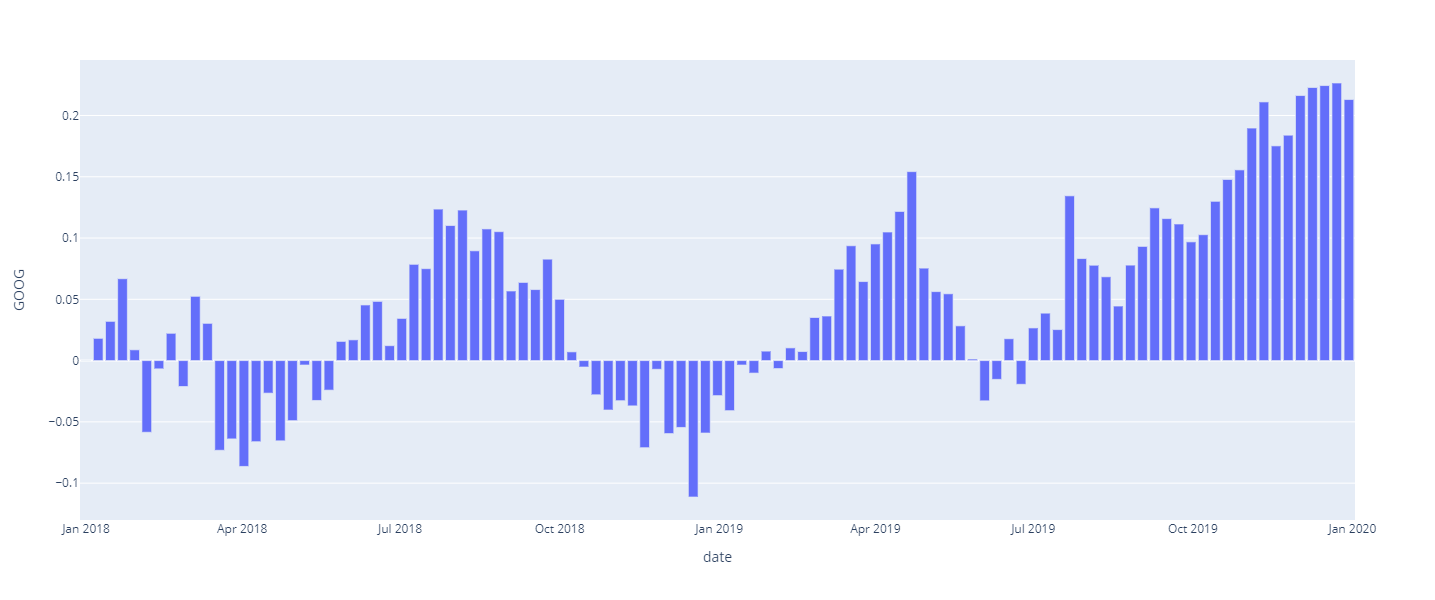

In [87]:
hist_googl = px.data.stocks(indexed=True)-1
fig = px.bar(hist_googl, x=hist_googl.index, y="GOOG", height=600)
fig.show()

In [88]:
# YTD Data - Google
ytd_googl = GOOGL.history(period="ytd")
ytd_googl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,2901.100098,2917.020020,2874.260010,2899.830078,1432300,0,0
2022-01-04,2907.919922,2929.699951,2874.330078,2887.989990,1420000,0,0
2022-01-05,2888.399902,2889.989990,2753.760010,2755.500000,2730900,0,0
2022-01-06,2739.969971,2798.800049,2731.169922,2754.949951,1867400,0,0
2022-01-07,2762.909912,2768.969971,2715.330078,2740.340088,1487700,0,0


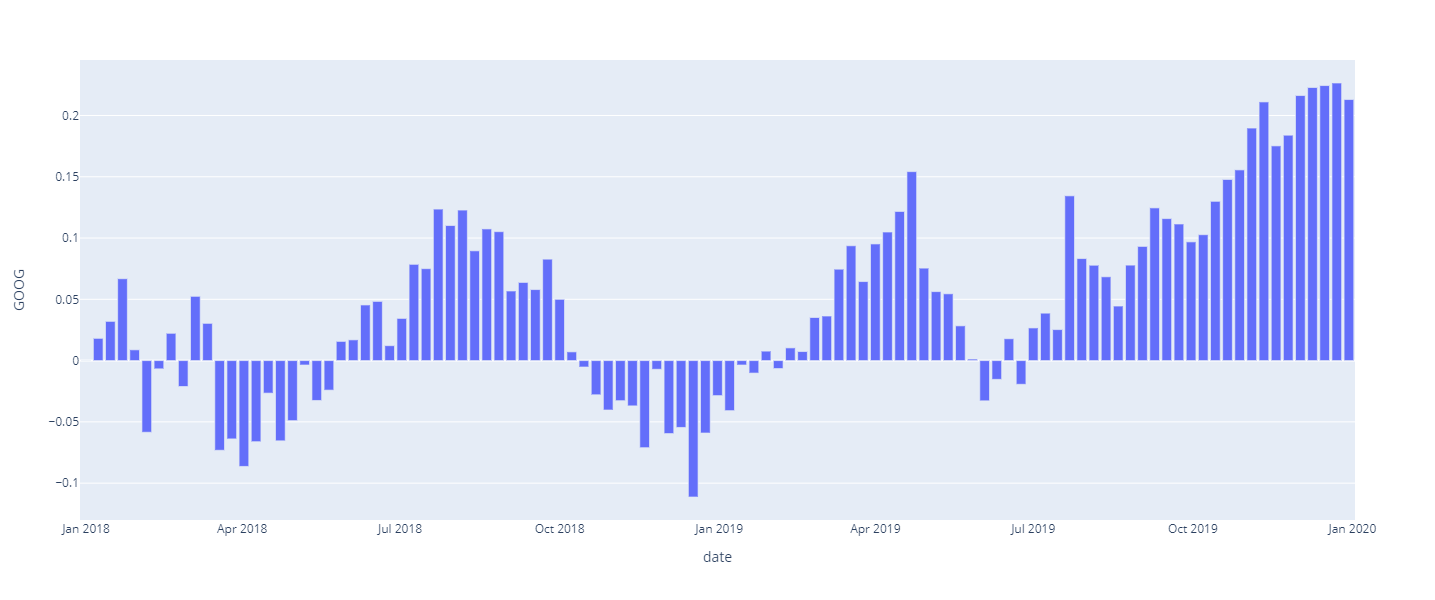

In [89]:
ytd_googl = px.data.stocks(indexed=True)-1
fig = px.bar(ytd_googl, x=ytd_googl.index, y="GOOG", height=600)
fig.show()

In [91]:
ytd_googl.to_csv('google_financials.csv')

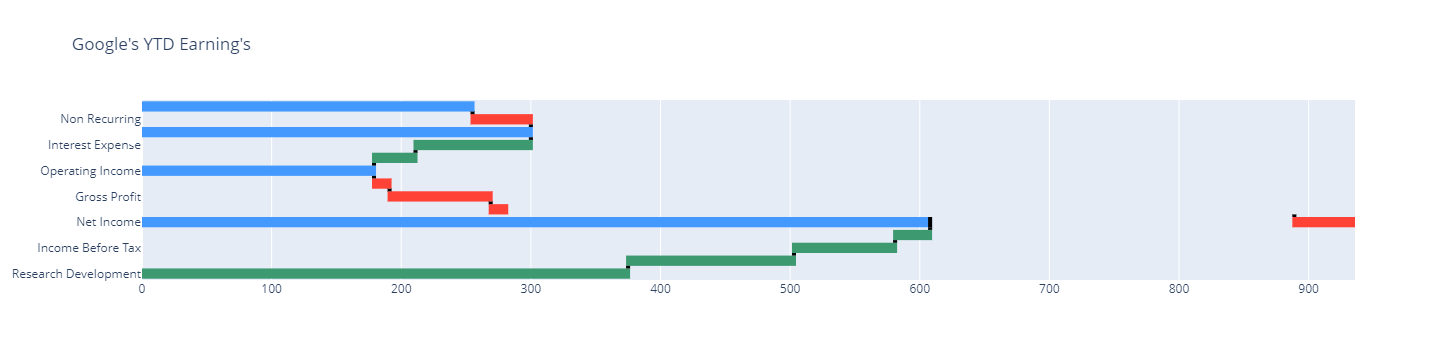

In [92]:
# Display Google's P&L statement (FY2021-22) using a waterfall chart
fig = go.Figure(go.Waterfall(
    name = "FY2021-22", orientation = "h", measure = ["relative", "relative", "relative", "relative", "total", "relative",
                                              "relative", "relative", "relative", "total", "relative", "relative", "total", "relative", "total"],
    y = ["Research Development", "Effect Of Accounting Charges", "Income Before Tax", "Minority Interest", "Net Income", "Net Income", 
         "Selling General Administrative", "Gross Profit", "Ebit", "Operating Income", "Other Operating Expenses", "Interest Expense", 
         "Extraordinary Items", "Non Recurring", "Other Items", "Income Tax Expense", "Total Revenue", "Total Operating Expenses", 
         "Cost Of Revenue", "Total Other Income Expenses Net", "Discontinued Operations", "Net Income From Continuing Ops", "Net Income Applicable to Common Shares"],
    x = [375, 128, 78, 27, None, -327, -12, -78, -12, None, 32, 89, None, -45, None],
    connector = {"mode":"between", "line":{"width":4, "color":"rgb(0, 0, 0)", "dash":"solid"}}
))

fig.update_layout(title = "Google's YTD Earning's ")

fig.show()

# Microsoft

In [93]:
# MICROSOFT
# Historical price data
hist_MSFT = MSFT.history(period="max")
hist_MSFT.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0


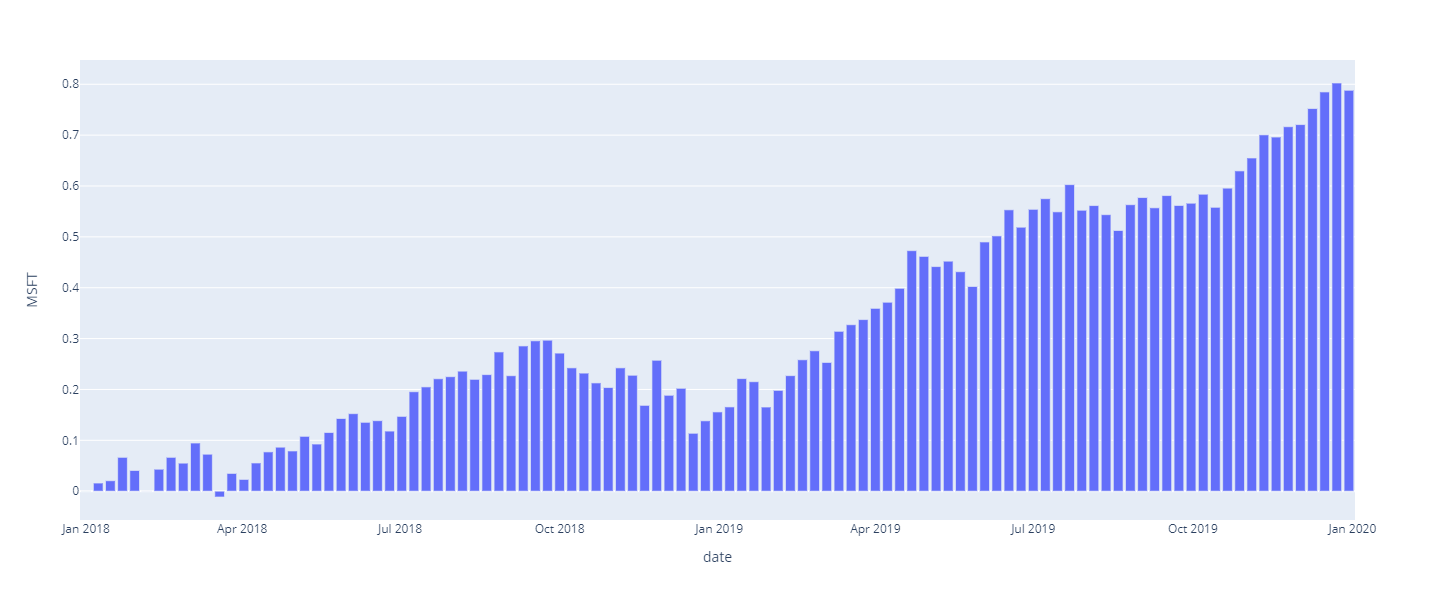

In [94]:
hist_MSFT = px.data.stocks(indexed=True)-1
fig = px.bar(hist_MSFT, x=hist_MSFT.index, y="MSFT", height=600)
fig.show()

In [95]:
# Microsoft stock data - FY2021-22
ytd_MSFT = MSFT.history(period="ytd")
ytd_MSFT.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,334.658033,337.302559,329.099519,334.059265,28865100,0.0,0
2022-01-04,334.139083,334.508345,325.447064,328.331116,32674300,0.0,0
2022-01-05,325.187592,325.397181,315.328004,315.727173,40054300,0.0,0
2022-01-06,312.503826,318.042392,310.847247,313.232330,39646100,0.0,0
2022-01-07,313.501757,315.846914,309.450137,313.391998,32674000,0.0,0


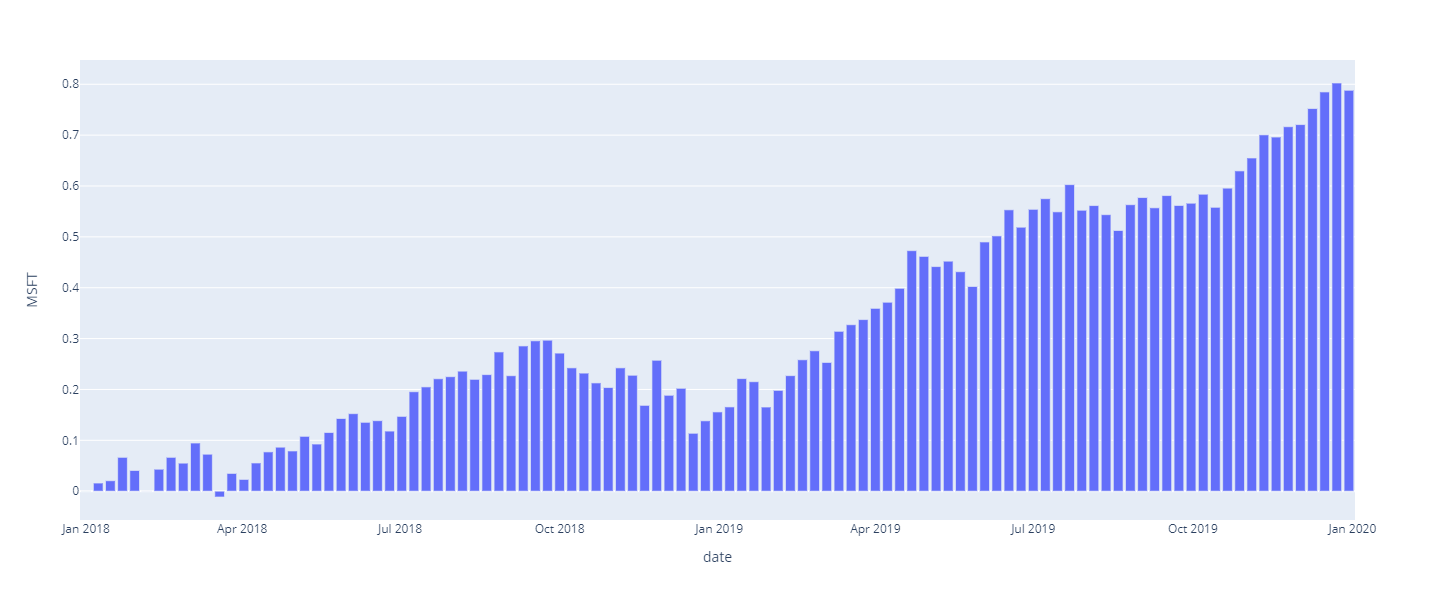

In [96]:
ytd_MSFT = px.data.stocks(indexed=True)-1
fig = px.bar(ytd_MSFT, x=ytd_MSFT.index, y="MSFT", height=600)
fig.show()

In [97]:
# Download Microsoft Dataframe 
data_MSFT = yf.download("MSFT", period="max")
data_MSFT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061252,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063439,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064533,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062892,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061799,47894400


In [98]:
# MSFT Financials 
MSFT_financials = MSFT.financials
MSFT_financials.head()

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Research Development,20716000000.0,19269000000.0,16876000000.0,14726000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,71102000000.0,53036000000.0,43688000000.0,36474000000.0
Minority Interest,None,None,None,None
Net Income,61271000000.0,44281000000.0,39240000000.0,16571000000.0


In [99]:
# Save DataFrame as CSV
MSFT_financials.to_csv('MSFT_financials.csv')

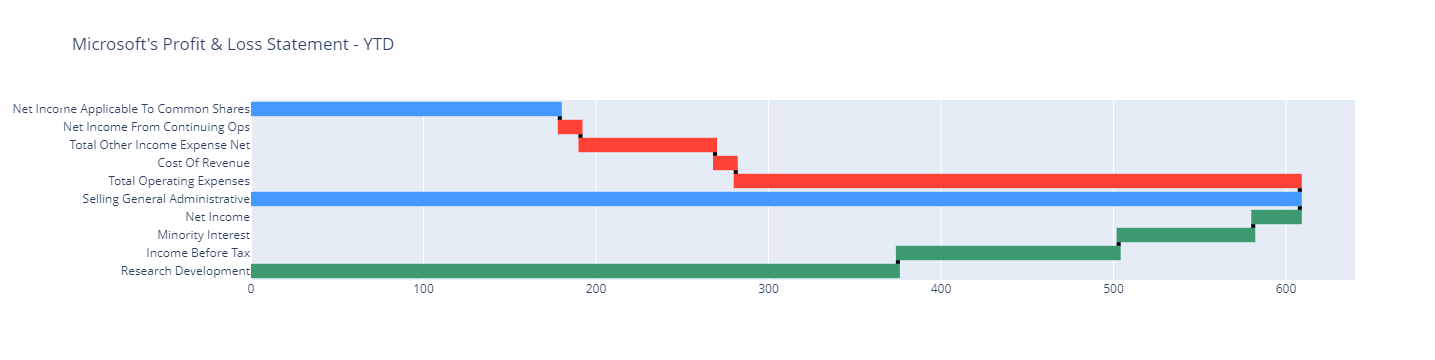

In [100]:
# Display Microsoft's P&L statement (FY2021-22) using a waterfall chart
fig = go.Figure(go.Waterfall(
    name = "YTD", orientation = "h", measure = ["relative", "relative", "relative", "relative", "total", "relative",
                                              "relative", "relative", "relative", "total", "relative", "relative", "total", "relative", "total"],
    y = ["Research Development", "Income Before Tax", "Minority Interest", "Net Income", "Selling General Administrative", "Total Operating Expenses", "Cost Of Revenue", "Total Other Income Expense Net", "Net Income From Continuing Ops", "Net Income Applicable To Common Shares"],
    x = [375, 128, 78, 27, None, -327, -12, -78, -12, None, 32, 89, None, -45, None],
    connector = {"mode":"between", "line":{"width":4, "color":"rgb(0, 0, 0)", "dash":"solid"}}
))

fig.update_layout(title = "Microsoft's Profit & Loss Statement - YTD")

fig.show()

## Conduct Quantitative Analysis
#### Calculate & Plot Daily Returns

In [ ]:
# FB - calculate daily returns


In [ ]:
# Google - calculate daily returns




In [ ]:
# Tesla - calculate daily returns



In [ ]:
# Microsoft - calculate daily returns 




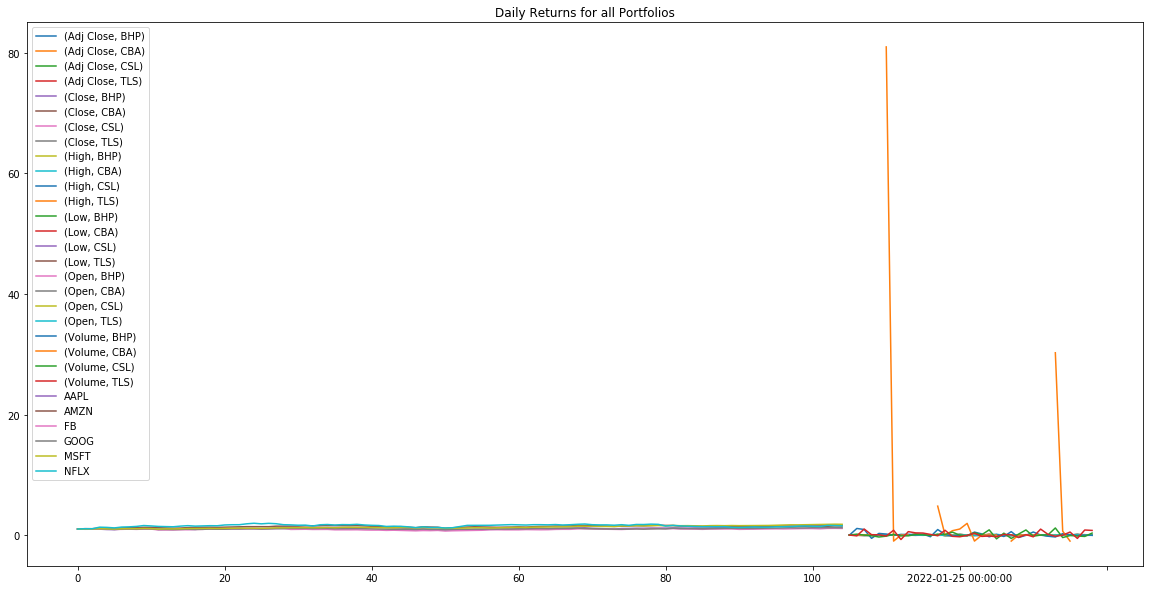

In [128]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10),title='Daily Returns for all Portfolios')

## Risk Analysis
#### Create a box plot for each portfolio

C:\Users\CharbelNehme\anaconda3\envs\pyvizenv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



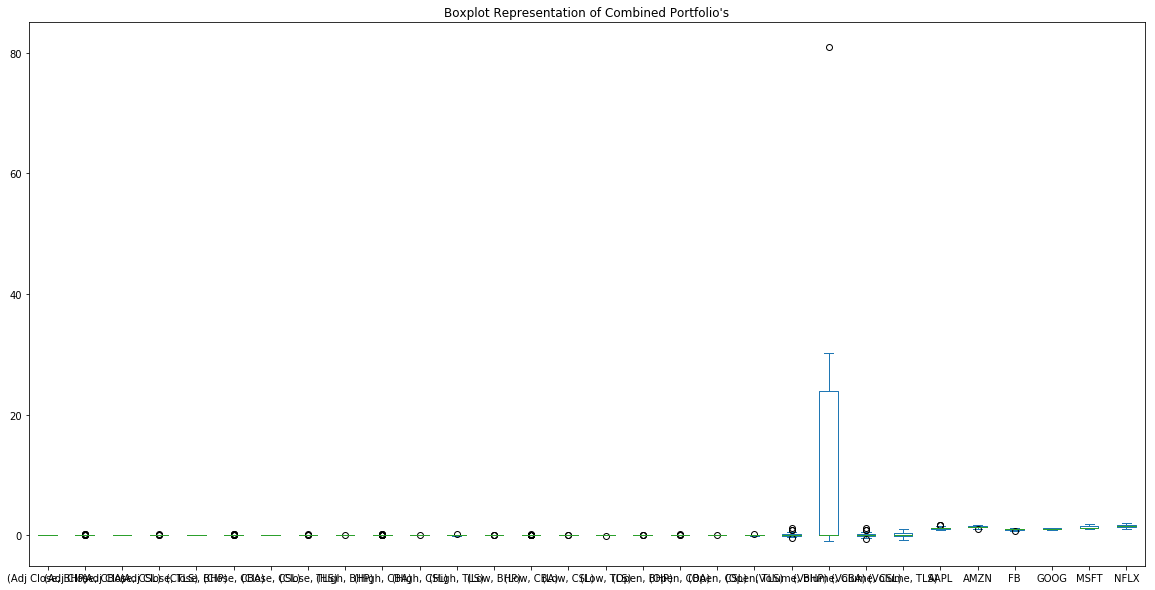

In [129]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10),title="Boxplot Representation of Combined Portfolio's")

#### Calculate Standard Deviations

In [130]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

C:\Users\CharbelNehme\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



(Adj Close, BHP)    0.018665
(Adj Close, CBA)    0.037257
(Adj Close, CSL)    0.016083
(Adj Close, TLS)    0.040515
(Close, BHP)        0.018665
(Close, CBA)        0.037257
(Close, CSL)        0.016136
(Close, TLS)        0.040515
(High, BHP)         0.018962
(High, CBA)         0.042138
(High, CSL)         0.020039
(High, TLS)         0.038886
(Low, BHP)          0.020120
(Low, CBA)          0.032366
(Low, CSL)          0.016124
(Low, TLS)          0.039795
(Open, BHP)         0.019161
(Open, CBA)         0.037955
(Open, CSL)         0.020377
(Open, TLS)         0.047333
(Volume, BHP)       0.370528
(Volume, CBA)            NaN
(Volume, CSL)       0.376261
(Volume, TLS)       0.443759
AAPL                0.182109
AMZN                0.140796
FB                  0.103350
GOOG                0.077776
MSFT                0.220662
NFLX                0.200508
dtype: float64

#### Annualized Standard Deviation

### Calculate and plot rolling std for all portfolios with 21-day window

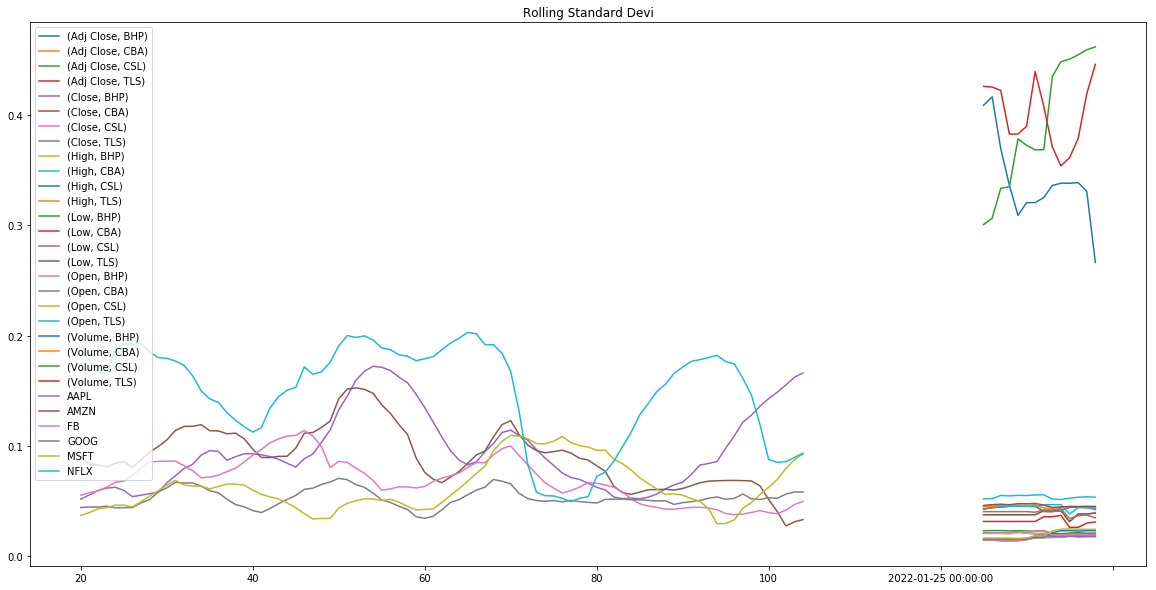

In [131]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()

# Plot the rolling standard deviation (21 day window)
combined_df.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Devi")

# Calculate and plot the correlation

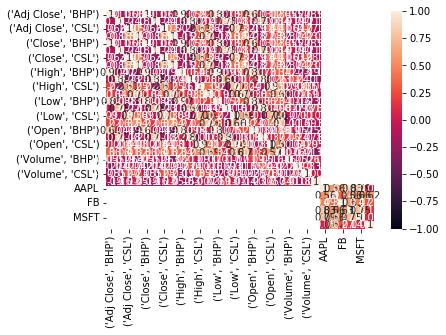

In [132]:
# Calculate the correlation using 'pearson' method
correlation_pearson = combined_df.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

# Calculate and Plot Beta for FB stocks v Australian high growth stocks? 

In [ ]:
covariance = combined_df['']